In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BIDI4.SA','JBSS3.SA', 'ALPA4.SA', 'LREN3.SA', 'MGLU3.SA']

In [3]:
df = pd.DataFrame()
for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-1')['Adj Close']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2019-01-02 to 2020-01-03
Data columns (total 5 columns):
BIDI4.SA    249 non-null float64
JBSS3.SA    249 non-null float64
ALPA4.SA    249 non-null float64
LREN3.SA    249 non-null float64
MGLU3.SA    249 non-null float64
dtypes: float64(5)
memory usage: 11.7 KB


## Normalization

In [5]:
df.iloc[0]

BIDI4.SA     6.207135
JBSS3.SA    12.038632
ALPA4.SA    14.000000
LREN3.SA    38.791130
MGLU3.SA    22.766758
Name: 2019-01-02 00:00:00, dtype: float64

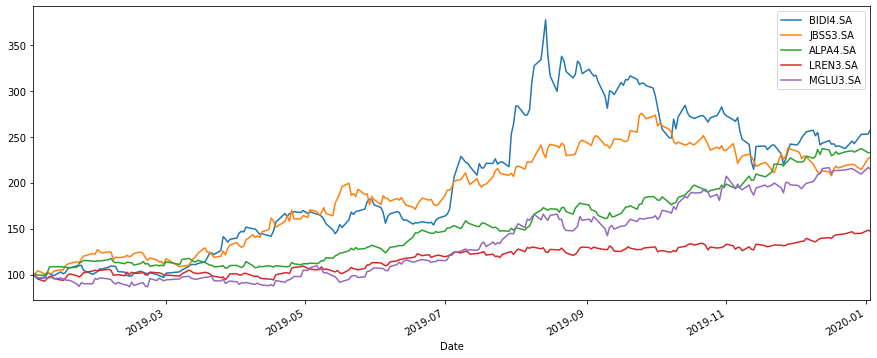

In [6]:
(df / df.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

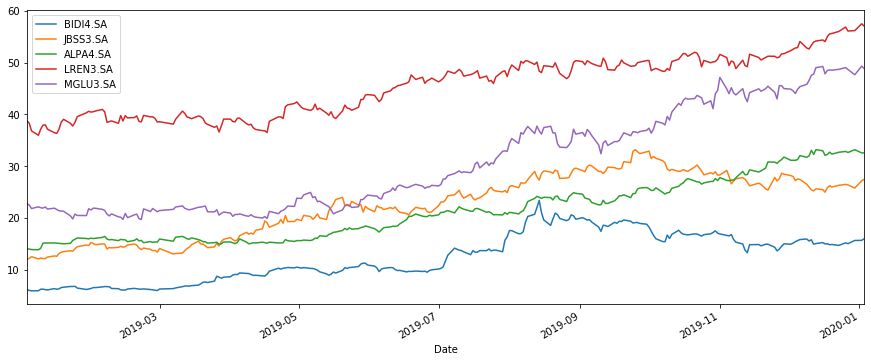

In [7]:
df.plot(figsize=(15,6))
plt.show()

## Search methods

In [10]:
df.loc['2019-12-30']
df.iloc[0]

BIDI4.SA     6.207135
JBSS3.SA    12.038632
ALPA4.SA    14.000000
LREN3.SA    38.791130
MGLU3.SA    22.766758
Name: 2019-01-02 00:00:00, dtype: float64

## Simple Return

In [11]:
returns = (df/df.shift(1)) - 1
returns.head()

,BIDI4.SA,JBSS3.SA,ALPA4.SA,LREN3.SA,MGLU3.SA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.028889,0.015781,0.001714,-0.012629,-0.010702
2019-01-04,-0.012266,0.026165,-0.007416,-0.038372,-0.030435
2019-01-07,0.003964,-0.035060,-0.002299,-0.022974,0.015525
2019-01-08,0.047631,0.015690,0.019585,0.032178,-0.008054


In [12]:
weights = np.array([0.30,0.20,0.15,0.15,0.20])

In [13]:
np.dot(returns, weights)

array([        nan, -0.00928822, -0.01140186, -0.00650864,  0.02358085,
        0.01250711, -0.00290769, -0.00404049,  0.01459554, -0.01015274,
        0.01277793,  0.02029744,  0.00645276, -0.00176962, -0.00400453,
        0.02321151, -0.00548151, -0.00608628,  0.01647152,  0.01072424,
        0.00901026, -0.00259316,  0.00871379,  0.00103991, -0.03189703,
       -0.00127358, -0.0112643 , -0.00969572, -0.00043224, -0.01300537,
        0.01739434,  0.00121856,  0.01655185, -0.00086213, -0.02676914,
       -0.00625284,  0.02807429, -0.01261881, -0.00334693, -0.00493723,
       -0.014421  ,  0.03310731, -0.01441362,  0.02274273,  0.02220072,
        0.00482565, -0.00061116,  0.0013154 ,  0.01216159,  0.01644592,
        0.00201477,  0.0095614 , -0.00545069, -0.02212212,  0.01118329,
        0.05122437, -0.03037295,  0.01336681,  0.02375868,  0.00492983,
       -0.00206235,  0.0021596 ,  0.00607119,  0.02883579, -0.00923439,
       -0.00926669,  0.00118044, -0.01330306,  0.00685392, -0.00

In [14]:
annual_return = returns.mean() * 250
annual_return

BIDI4.SA    1.102137
JBSS3.SA    0.930387
ALPA4.SA    0.892384
LREN3.SA    0.429064
MGLU3.SA    0.853471
dtype: float64

In [15]:
np.dot(annual_return, weights)

0.8856298762644346

In [16]:
portf_1 = '{}% ao ano'.format(round(np.dot(annual_return, weights),5) * 100)
portf_1

'88.563% ao ano'

In [17]:
weights_2 = np.array([0.20,0.20,0.25,0.25,0.20])

In [18]:
portf_2 = '{}% ao ano'.format(round(np.dot(annual_return, weights_2),5) * 100)
print(' pf1: {}\n pf2: {}'.format(portf_1,portf_2))

 pf1: 88.563% ao ano
 pf2: 90.756% ao ano
